<h1> Datos para probar las técnicas de analísis. </h1>

<h2>Los pasos que intentare seguir para tener una metodología son: </h2>
<br>
<li>Paso cero: Extraccion de los datos, limpieza, reducción y eliminación en los casos que apliquen.</li>
<li>Paso uno: Estandarizar, normalizar y/o reducir los datos.</li>
<li>Paso dos: Codificar las variables categoricas.</li>
<li>Paso tres: Escojer el médelo de machine learning que nos ayude a resolver el problema</li>

In [1]:
#Import las primeras librerias que podriamos utilizar
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Leer el archivo que en esta ocasión esta separada por tabulaciones
df = pd.read_csv("Customers.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Vamos a revisar los tipos de datos que contiene la matriz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Vamos a revisar que colbumnas tienen valores perdidos y cuantos son.
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#en esta base solo faltan datos en la columna income. 
24/2240 #Como son 24 y la base es de 2240 las vamos a elimnar de la matriz. 
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
#Vamos a separar las vriables categoricas de las numericas para un mejor entendimiento, bueno yo. 
df_objects  = df.select_dtypes("object") 
df_numeric = df.select_dtypes(np.number)
print( df_numeric.columns )
print( df_objects.columns ) 

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [7]:
#Calculemos la edad del cliente
df["Age_"] = 2022 - df["Year_Birth"]

In [8]:
# Agrupemos las edades para despué analizar
bins= [0,13,21,40,90]
labels = ['Child','Teens','Adult','Old']
df['Age_range'] = pd.cut(df['Age_'], bins=bins, labels=labels, right=False)

In [9]:
#Las siguientes columnas nos dicen el gasto las compras y las campañas, asi que se intetnan agrupar
gastos = df.columns[8:14]
compras = df.columns[14:19]
campañas = df.columns[19:24]

In [10]:
#Agrgar todo el gasto en una sola columna
# add total_spent column:
df['Total_spent'] = df[gastos].sum(axis=1)

In [11]:
# Vamos a reemplazar la variable education categorica por una numerica.
print( "Hay que mirar el nombre de las categorias\n", df["Education"].value_counts() )
#Yo voy a clasificarlas en tres por desconocimiento
categorias = {"Graduation":"graduate", "PhD":"postgraduate", "Master":"postgraduate", "2n Cycle":"Undergraduate", "Basic":"Undergraduate"}
df["Education_"] = df["Education"].replace(categorias)
print( "Hay que mirar el nombre de las categorias\n", df["Education_"].value_counts())

Hay que mirar el nombre de las categorias
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Hay que mirar el nombre de las categorias
 graduate         1116
postgraduate      846
Undergraduate     254
Name: Education_, dtype: int64


In [12]:
# Vamos a reemplazar la variable education categorica por una numerica.
print( "Hay que mirar el nombre de las categorias\n", df["Marital_Status"].value_counts() )
categorias = {"Married":"married", "Together":"married", "Single":"single", "Divorced":"single", "Widow":"single", "Alone":"single", "Absurd":"single", "YOLO":"single"}
df["Marital_Status_"] = df["Marital_Status"].replace(categorias)
print( "Hay que mirar el nombre de las categorias\n", df["Marital_Status_"].value_counts() )


Hay que mirar el nombre de las categorias
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Hay que mirar el nombre de las categorias
 married    1430
single      786
Name: Marital_Status_, dtype: int64


In [13]:
#Vamos a colocar el numero de niños en una sola variable
df["Children_"] = df["Kidhome"] + df["Teenhome"]

In [14]:
#Aqui calculamos el numero de años que el cliente tiene con nosotros
df['Dt_Customer_'] = 2022 - pd.DatetimeIndex(df['Dt_Customer']).year

In [15]:
# Changing some columns names :
df = df.rename(columns={"NumDealsPurchases": "Deals","NumWebPurchases":"Web","NumCatalogPurchases":"Purchases",
                        "NumStorePurchases":"Store","NumWebVisitsMonth":"Visits"})

In [16]:
# Changing some columns names :
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish"
                          ,"MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [17]:
# Changing some columns names :
df = df.rename(columns={"AcceptedCmp1": "Cm1","AcceptedCmp2": "Cm2","AcceptedCmp3": "Cm3",
                        "AcceptedCmp4": "Cm4", "AcceptedCmp5": "Cm5"})

In [18]:
# Dropping some of the unwanted features:
columns_drop = ["Education","Marital_Status", "Kidhome","Teenhome","Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"] 
df = df.drop(columns_drop , axis = 1)

In [19]:
#Si verificamos ya no hay variables categoricas con teto ahora se han categorizado con numeros. 
df_objects  = df.select_dtypes("object") 
df_numeric = df.select_dtypes(np.number)
print( df_numeric.columns )
print( df_objects.columns ) 
#Entonces vamos a analizar por outliers.

Index(['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'Deals', 'Web', 'Purchases', 'Store', 'Visits', 'Cm3', 'Cm4',
       'Cm5', 'Cm1', 'Cm2', 'Complain', 'Response', 'Age_', 'Total_spent',
       'Children_', 'Dt_Customer_'],
      dtype='object')
Index(['Education_', 'Marital_Status_'], dtype='object')


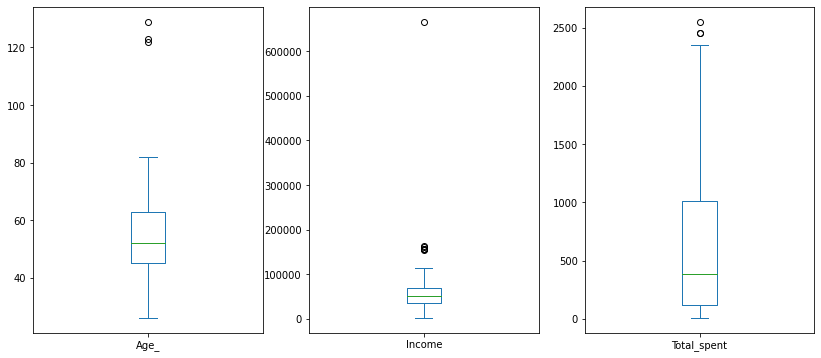

In [20]:
numeric_columns = ['Age_','Income','Total_spent']
plt.figure(figsize = (14, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i+1)
    df[col].plot(kind = 'box')

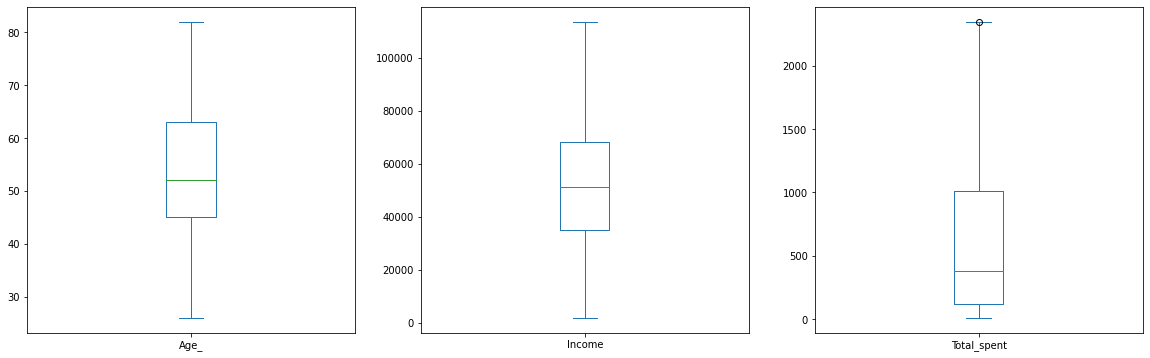

In [21]:
#VAmos a eliminar losoutliers, pero aqui deberia aber una persona ocn expertis en la tiend aque nos acosejara de los consumos
def remove_outlier(df, columns):
    df = df.copy()
    for col in columns:
        q1 = df[col].quantile(q = 0.25)
        q3 = df[col].quantile(q = 0.75)
        intr_qr = q3 - q1
        upper_range = q3 + (1.5*intr_qr)
        lower_range = q1 - (1.5*intr_qr)
        df.loc[df[col] > upper_range, col] = np.nan
        df.loc[df[col] < lower_range, col] = np.nan
    return df.dropna()
df = remove_outlier(df, numeric_columns)

plt.figure(figsize = (20, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i+1)
    df[col].plot(kind = 'box')

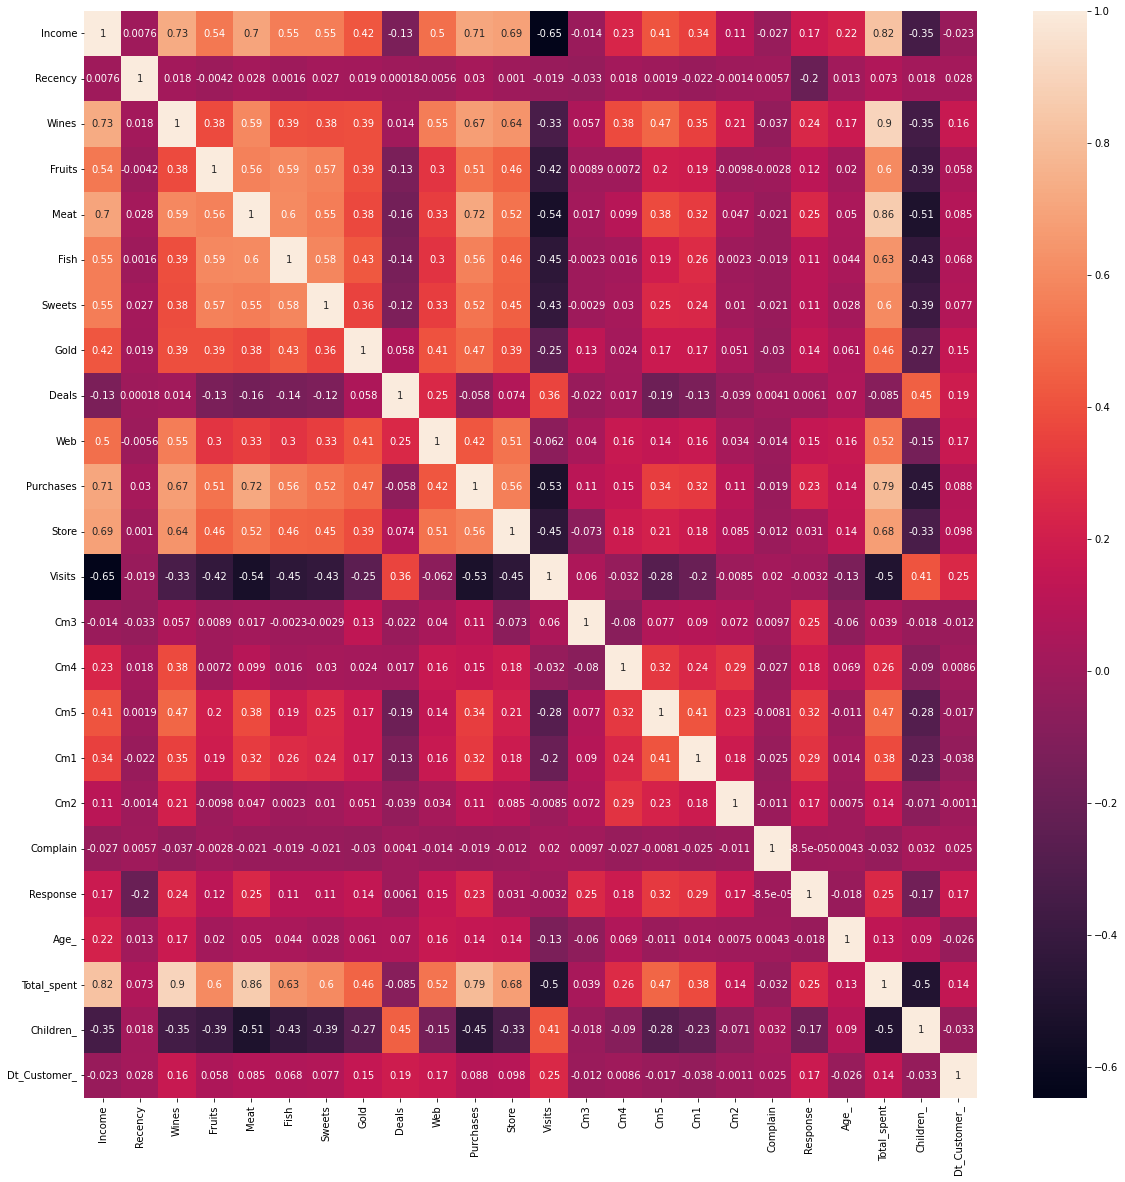

In [22]:
# Miremos la correlacion de cada variable
plt.figure(figsize=(20,20))  
corr = df.corr()
sns.heatmap(corr, annot= True)
plt.show()

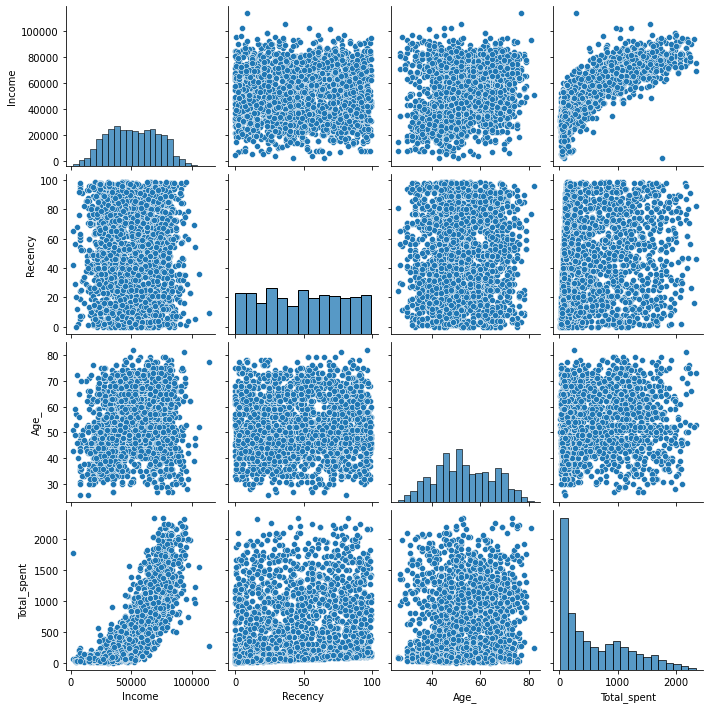

In [23]:
#Plotting following features
columns = [ "Income", "Recency", "Age_", "Total_spent"]
sns.pairplot(df[columns])
plt.show()

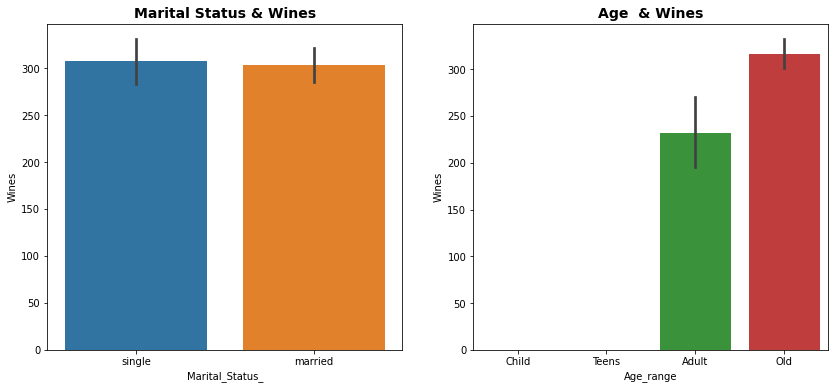

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Wines', fontsize= 14, weight = 'bold')
sns.barplot(data = df , x ='Marital_Status_', y = 'Wines', ax = ax1)

sns.barplot(data = df , x ='Age_range', y = 'Wines',  ax = ax2)
ax2.set_title('Age  & Wines', fontsize= 14, weight = 'bold')

plt.show()

In [25]:
#Aquí continuaremos generando hipotesis
data = df.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in df.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        print('\n')
        print('Columns Name: %s' %col)
        print('************')
        data[col] = data[[col]].apply(encoder.fit_transform)
        for i in range(len(encoder.classes_)):
            print(encoder.classes_[i],':', i)



Columns Name: Age_range
************
Adult : 0
Old : 1


Columns Name: Education_
************
Undergraduate : 0
graduate : 1
postgraduate : 2


Columns Name: Marital_Status_
************
married : 0
single : 1


In [48]:
"""
Age_range_dummies = pd.get_dummies( data["Age_range"], prefix = Age_range)
",'Education_','Marital_Status_','Cm3','Cm4','Cm5','Cm1','Cm2','Complain','Response'
"""

'\nAge_range_dummies = pd.get_dummies( data["Age_range"], prefix = Age_range)\n",\'Education_\',\'Marital_Status_\',\'Cm3\',\'Cm4\',\'Cm5\',\'Cm1\',\'Cm2\',\'Complain\',\'Response\'\n'

In [49]:
"""
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
columnas_categoricas=['Age_range','Education_','Marital_Status_','Cm3','Cm4','Cm5','Cm1','Cm2','Complain','Response']

for col in columnas_categoricas:    
    print('\n')
    print('Columns Name: %s' %col)
    print('************')
    data[col] = data[[col]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)
"""

"\nfrom sklearn.preprocessing import OneHotEncoder\nencoder = OneHotEncoder()\ncolumnas_categoricas=['Age_range','Education_','Marital_Status_','Cm3','Cm4','Cm5','Cm1','Cm2','Complain','Response']\n\nfor col in columnas_categoricas:    \n    print('\n')\n    print('Columns Name: %s' %col)\n    print('************')\n    data[col] = data[[col]].apply(encoder.fit_transform)\n    for i in range(len(encoder.classes_)):\n        print(encoder.classes_[i],':', i)\n"

In [50]:
numeric_columns = ['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets','Gold', 'Age_', 'Total_spent']
#Al no haber información perdida vamos a centrar la información. 
#En este caso la vamos a standarizar media ceero y desviacion standar uno
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
for col in numeric_columns:
    data[col] = scaler.fit_transform(data[[col]])
data.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,...,Cm2,Complain,Response,Age_,Age_range,Total_spent,Education_,Marital_Status_,Children_,Dt_Customer_
0,0.317669,58,0.982089,1.560050,1.764807,2.450732,1.491629,0.850191,3,8,...,0,0,1,1.016304,1,1.705380,1,1,0,10
1,-0.252786,38,-0.874727,-0.637988,-0.732143,-0.650963,-0.634637,-0.734795,2,1,...,0,0,0,1.273043,1,-0.959645,1,1,2,8
2,0.969430,26,0.360174,0.574723,-0.172641,1.337771,-0.145840,-0.038948,1,8,...,0,0,0,0.331669,1,0.262988,1,0,0,9
3,-1.205543,26,-0.874727,-0.562193,-0.667407,-0.505001,-0.585757,-0.754125,2,2,...,0,0,0,-1.294340,0,-0.933483,1,0,1,8
4,0.325166,94,-0.392669,0.423134,-0.214257,0.151828,0.000799,-0.560834,5,5,...,0,0,0,-1.037602,1,-0.188741,2,0,1,8


In [51]:
#Para mirar el resultado hay que reducir las dimensiones del dataframe de 12 a 2.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.values)
train_pca = pca.transform(data.values)
print("Original shape: {}".format(str(data.shape)))
print("Reduced shape: {}".format(str(train_pca.shape)))
data = pd.DataFrame ( train_pca , columns=["pc1","pc2"])

Original shape: (2202, 27)
Reduced shape: (2202, 2)


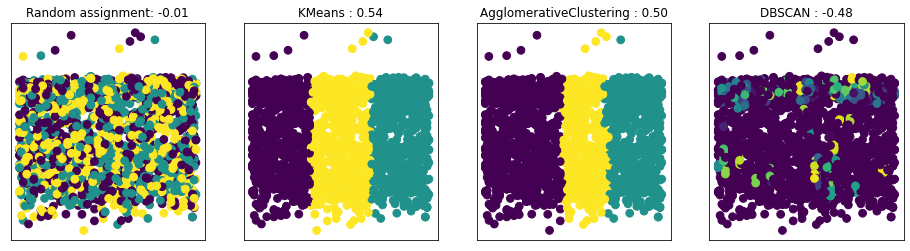

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN()]

fig, axes = plt.subplots(1, 4, figsize=(16, 4), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=3, size=len(df))

#plot random assignment
axes[0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=random_clusters, s=60)
axes[0].set_title("Random assignment: {:.2f}".format( silhouette_score(data, random_clusters)))


for ax, algorithm in zip(axes[1:], algorithms):    
    clusters = algorithm.fit_predict(data)    
    # plot the cluster assignments and cluster centers
    ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,silhouette_score(data, clusters)))

In [53]:
print( df.shape , data.shape)
kmeans = KMeans(n_clusters=3, random_state=0)
catgeory = kmeans.fit_predict(data)
category = pd.DataFrame( kmeans.labels_, columns= ["Category"])
print( category.shape ) 
index = np.arange(0,2202)
df = df.reindex( index )
print( df.index ) 
print( category.index )
data_cluster = result = pd.merge(df, category, left_index=True, right_index=True, how="inner")
data_cluster.shape

(2202, 27) (2202, 2)
(2202, 1)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201],
           dtype='int64', length=2202)
RangeIndex(start=0, stop=2202, step=1)


(2202, 28)

In [54]:
data_cluster.head()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,...,Complain,Response,Age_,Age_range,Total_spent,Education_,Marital_Status_,Children_,Dt_Customer_,Category
0,58138.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,...,0.0,1.0,65.0,Old,1587.0,graduate,single,0.0,10.0,1
1,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,...,0.0,0.0,68.0,Old,59.0,graduate,single,2.0,8.0,1
2,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,...,0.0,0.0,57.0,Old,760.0,graduate,married,0.0,9.0,2
3,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,...,0.0,0.0,38.0,Adult,74.0,graduate,married,1.0,8.0,2
4,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,...,0.0,0.0,41.0,Old,501.0,postgraduate,married,1.0,8.0,0


In [56]:
data_cluster.to_csv("Customer_clustered.csv")